In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Abhinay.Verma\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [57]:
df = pd.read_csv('Flight_Training.csv')
df.head()

,Unnamed: 0,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


In [58]:
df.shape

(10683, 19)

In [59]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [70]:
df.isna().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Stops              0
Arrival_Hour       0
Arrival_Minute     0
Dep_Hour           0
Dep_Minute         0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [71]:
x = df.drop(['Price'], axis=1)
y = df.Price

In [72]:
x.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,1,3,2019,1,21,35,16,50,0,34,8,12,4


In [73]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [74]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [76]:
lassomodel = SelectFromModel(Lasso(alpha=0.005, random_state=42))
lassomodel.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=42))

In [77]:
lassomodel.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [78]:
selected_features = x_train.columns[(lassomodel.get_support())]
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stops', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_Minute',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [79]:
x_train.drop(['Year'], axis=1, inplace=True)
x_test.drop(['Year'], axis=1, inplace=True)

C:\Users\Abhinay.Verma\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
x_train.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
7106,8,0,2,8,6,4,0,8,35,5,55,0,13,24,12,4
7904,1,2,1,8,1,6,1,6,50,5,15,3,41,6,12,4
4861,4,2,1,5,12,6,2,12,35,14,35,3,34,4,5,4
9375,3,2,1,8,15,6,1,21,0,6,40,3,7,6,12,4
155,1,3,0,8,9,5,2,7,55,8,20,2,28,4,3,4


## Random Forest Regressor

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [82]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [83]:
print("Coefficient of determination R^2 <-- on train set {}".format(rf.score(x_train,y_train)))
print("Coefficient of determination R^2 <-- on test set {}".format(rf.score(x_test,y_test)))

Coefficient of determination R^2 <-- on train set 0.9831408747594002
Coefficient of determination R^2 <-- on test set 0.8683102489307954


In [84]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf, x, y, cv=5)

In [85]:
print(score.mean())
print(score)

0.8957520559945706
[0.90133204 0.893765   0.87100986 0.90944262 0.90321076]


In [86]:
y_pred = rf.predict(x_test)

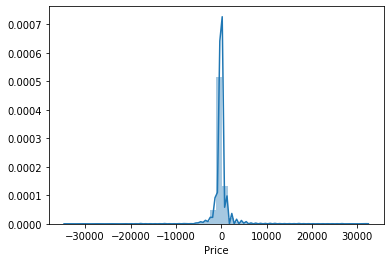

In [87]:
sns.distplot(y_test-y_pred)

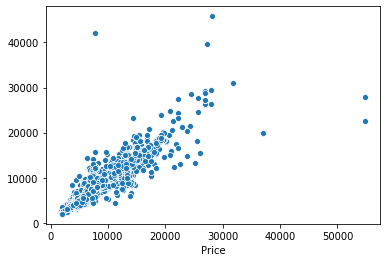

In [88]:
sns.scatterplot(y_test, y_pred)

In [89]:
from sklearn import metrics
print('MAE :', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE : 672.2040434965883
MSE: 2667566.9296301985
RMSE: 1633.2687867066456


## Hyperparameter tuning

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [91]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"n_estimators":[int(x) for x in np.linspace(start=100, stop=1200, num=12)],
             "max_features":['auto', 'sqrt'],
             "max_depth":[int(x) for x in np.linspace(5,30,6)],
             "min_samples_split":[2,5,10,15,100],
             "min_samples_leaf":[1,2,5,10]}
param_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [92]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, verbose=3, cv=5, n_jobs=1, random_state=42, scoring='neg_mean_squared_error')

In [93]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, score=-9844776.410, total=   1.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, score=-9242506.616, total=   1.6s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, score=-5868275.875, total=   1.6s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, score=-7497562.933, total=   1.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, score=-7618713.998, total=   1.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, score=-2425658.604, total=   4.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_featu

[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, score=-3367330.671, total=   7.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, score=-2989573.542, total=   8.9s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, score=-6510772.266, total=   8.3s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, score=-6249041.352, total=   6.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10

[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=-3804330.484, total=   1.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=-4293460.866, total=   1.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=-4856116.275, total=   1.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=-2700180.032, total=   1.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt,

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, score=-3390984.067, total=   9.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, score=-3858975.424, total=   9.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, score=-1956649.744, total=   9.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, score=-3242250.369, total=   9.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_featur

[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-7185531.329, total=   4.0s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-3864986.172, total=   4.1s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-5449983.506, total=   4.1s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, score=-5593703.006, total=   3.6s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=100, min_samples_l

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, score=-2369597.133, total=   7.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, score=-3682718.277, total=   6.1s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, score=-3511124.006, total=   6.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5, score=-7728455.290, total=   5.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, score=-4375746.880, total=   4.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, score=-4354150.285, total=   4.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15, score=-6233666.648, total=   1.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15, score=-5936959.663, total=   1.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=10, m

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 27.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [94]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [96]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200)

In [97]:
y_predict = rf_random.predict(x_test)

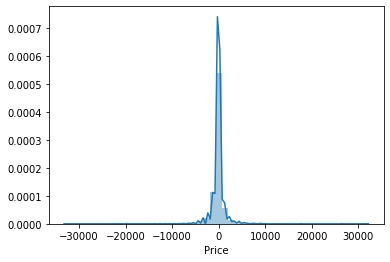

In [98]:
sns.distplot(y_test-y_predict)

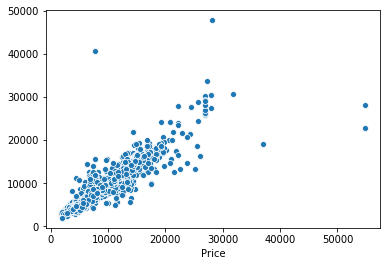

In [99]:
sns.scatterplot(y_test, y_predict)

In [100]:
print('MAE :', metrics.mean_absolute_error(y_test,y_predict))
print('MSE:', metrics.mean_squared_error(y_test,y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

MAE : 679.5049586168591
MSE: 2610122.0957293306
RMSE: 1615.5872293780149


In [102]:
import pickle
file = open('rf_regressor_flight_price_prediction.pkl', 'wb')
pickle.dump(rf_random, file)